## 1) Importing All Modules

In [22]:
from skimage.transform import pyramid_expand,pyramid_reduce
import cv2 as cv
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt


from pylab import rcParams
rcParams['figure.figsize'] = 20, 20




### Reading our 2 images, that we aim to Blend 

In [23]:
A = Image.open('Messi.jpg')
A = A.resize((480,360), Image.ANTIALIAS)
B = Image.open('Ronaldo.jpg')

A=np.asarray(A)
B=np.asarray(B)

### Making the Pyramid ,( Smoothing the Image on different image Scales ) Hence making the pyramid

In [24]:
CopyofA = A.copy()
gpA = [CopyofA/255]
for i in range(6):
    CopyofA =pyramid_reduce(CopyofA, downscale=2,multichannel=True)
#     plt.imshow(CopyofA,cmap='gray')
#     plt.show()
    gpA.append(CopyofA)

### Do Same as above for 2nd image


In [25]:
CopyofB = B.copy()
gpB = [CopyofB/255]
for i in range(6):
    CopyofB = pyramid_reduce(CopyofB, downscale=2,multichannel=True)
    gpB.append(CopyofB)

### Expand Back the Pyramid , and then Subtracting with the Previous Original image



In [26]:
lpA = [gpA[5]]
for i in range(6,0,-1):
    GE = pyramid_expand(gpA[i], upscale=2,multichannel=True)

    GE=cv.resize(GE,(gpA[i - 1].shape[1],gpA[i - 1].shape[0]))

    L=gpA[i-1]-GE

    lpA.append(L)

In [30]:
lpB = [gpB[5]]
for i in range(6,0,-1):
    GE = pyramid_expand(gpB[i], upscale=2,multichannel=True)
    GE = cv.resize(GE,(gpB[i - 1].shape[1],gpB[i - 1].shape[0]))
    L=gpB[i-1]-GE
    lpB.append(L)

###  Now add left and right halves of images in each level

In [31]:
LS = []

j=0
for i in zip(lpA,lpB):
    la,lb = i
    rows,cols,depth= la.shape
    ls = np.hstack((la[:,0:cols//2], lb[:,cols//2:]))
    j=j+1
    LS.append(ls)

ls_ = LS[0]
for i in range(1,6):
    ls_ = pyramid_expand(ls_, upscale=2,multichannel=True)    
    ls_= cv.resize(ls_,(LS[i].shape[1],LS[i].shape[0]))
    ls_=ls_+LS[i]


# image with direct connecting each half
B= cv.resize(B, A.shape[-2::-1])
real = np.hstack((A[:,:cols//2],B[:,cols//2:]))
ls_=ls_*255

### Visualizing Our Blended image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


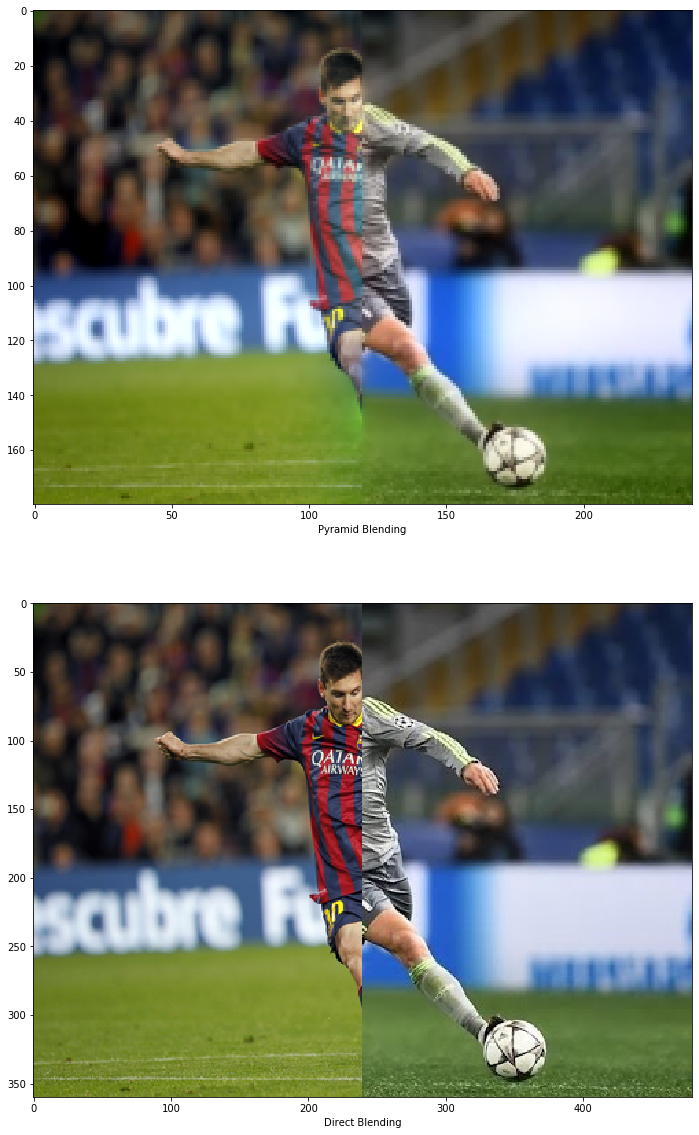

In [32]:
B= cv.resize(B, A.shape[-2::-1])
real = np.hstack((A[:,:cols//2],B[:,cols//2:]))


ls_=ls_.astype(int)


plt.subplot(2,1,1),plt.imshow(ls_)
plt.xlabel('Pyramid Blending')
plt.subplot(2,1,2),plt.imshow(real,cmap = 'gray')
plt.xlabel('Direct Blending')
plt.show()